In [146]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np
import readdata, filtering, analysis
%matplotlib inline
import matplotlib.pyplot as plt
import copy, os 
import model
cwd = os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
model = model.Model()

In [4]:
def plot_ep(n, datakey='raw_'):
    ep = model[datakey][n]
    fig = plt.figure(figsize=(10,5))
    fig.add_subplot(211)
    plt.plot(ep['trace'])
    fig.add_subplot(212)
    plt.plot(ep['piezo'])
    plt.show()

In [5]:
model.call_operation('FILTER_',1e3)

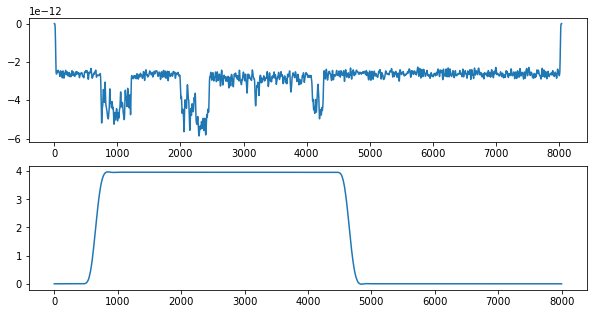

In [6]:
plot_ep(0,datakey='FILTER_')

In [7]:
ep = model['raw_'][0]

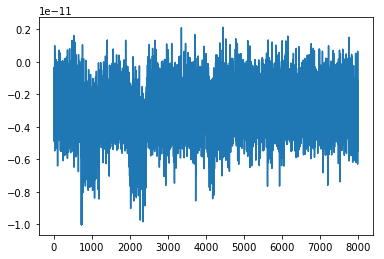

In [8]:
plt.plot(ep['trace'])
plt.show()

In [9]:
ints = [150,200]
time, trace = ep['time'], ep['trace']
fs = 4e4
epbc = analysis.baseline_correction(time, trace, fs, ints, degree=0)

In [10]:
epbcf1 = filtering.gaussian_filter(epbc, 1e3)

In [11]:
ys = [ep['trace'],ep['piezo']]
ylabels = ['trace', 'piezo']
x = ep['time']

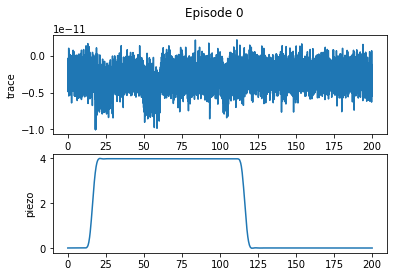

In [12]:
fig = plt.figure()
subplots = []
fig.suptitle('Episode 0')
# for i, (y, ylabel) in enumerate(zip(ys, labels)):
i = 0
y = ys[i]
ylabel = ylabels[i]
subplots.append(fig.add_subplot(len(ys),1,i+1))
plt.plot(x,y)
plt.ylabel(ylabel)
i = 1
y = ys[i]
ylabel = ylabels[i]
subplots.append(fig.add_subplot(len(ys),1,i+1))
plt.plot(x,y)
plt.ylabel(ylabel)


In [13]:
# model.call_operation('BC_',[[0,10],[125,200]])

In [14]:
model.call_operation('FILTER_',1e3)

In [15]:
trace = model['BC_FILTER_'][0]['trace']

KeyError: 'BC_FILTER_'

In [16]:
amplitudes = np.array([.7,1.4,2,2.6])*-1e-12

In [17]:
# %timeit idealization = threshold_crossing(trace,amplitudes)
### using the nexted for loop over each point

In [18]:
def threshold_crossing(signal,amplitudes):
    """
    Given a signal and amplitudes assign to each point in the signal its closest amplitude value. 
    Amplitude of 0 is assumed to be present.
    """
    amplitudes = np.sort(np.asarray(amplitudes).flatten())[::-1]
    if not 0 in amplitudes:
        amplitudes = np.hstack((0,amplitudes))
    Namps = len(amplitudes)
    thresholds = np.full(Namps,np.inf)
    for i, amplitude in enumerate(amplitudes[:-1]):
        threshold = (amplitudes[i+1]-amplitude)/2+amplitude
    idealization = np.zeros((Namps,len(signal)))
    for i, t in enumerate(thresholds[1:]):
        idealization[i] = np.where(np.abs(signal)<np.abs(t),0,1)
        
    output = np.zeros(len(signal))
    idealization = np.sum(idealization,axis=0)
    for i, a in enumerate(amplitudes):
        idealization[idealization==i]=a
    return idealization

In [19]:
idealization = threshold_crossing(trace,amplitudes)

In [210]:
np.full((2,2),np.inf)

array([[ inf,  inf],
       [ inf,  inf]])

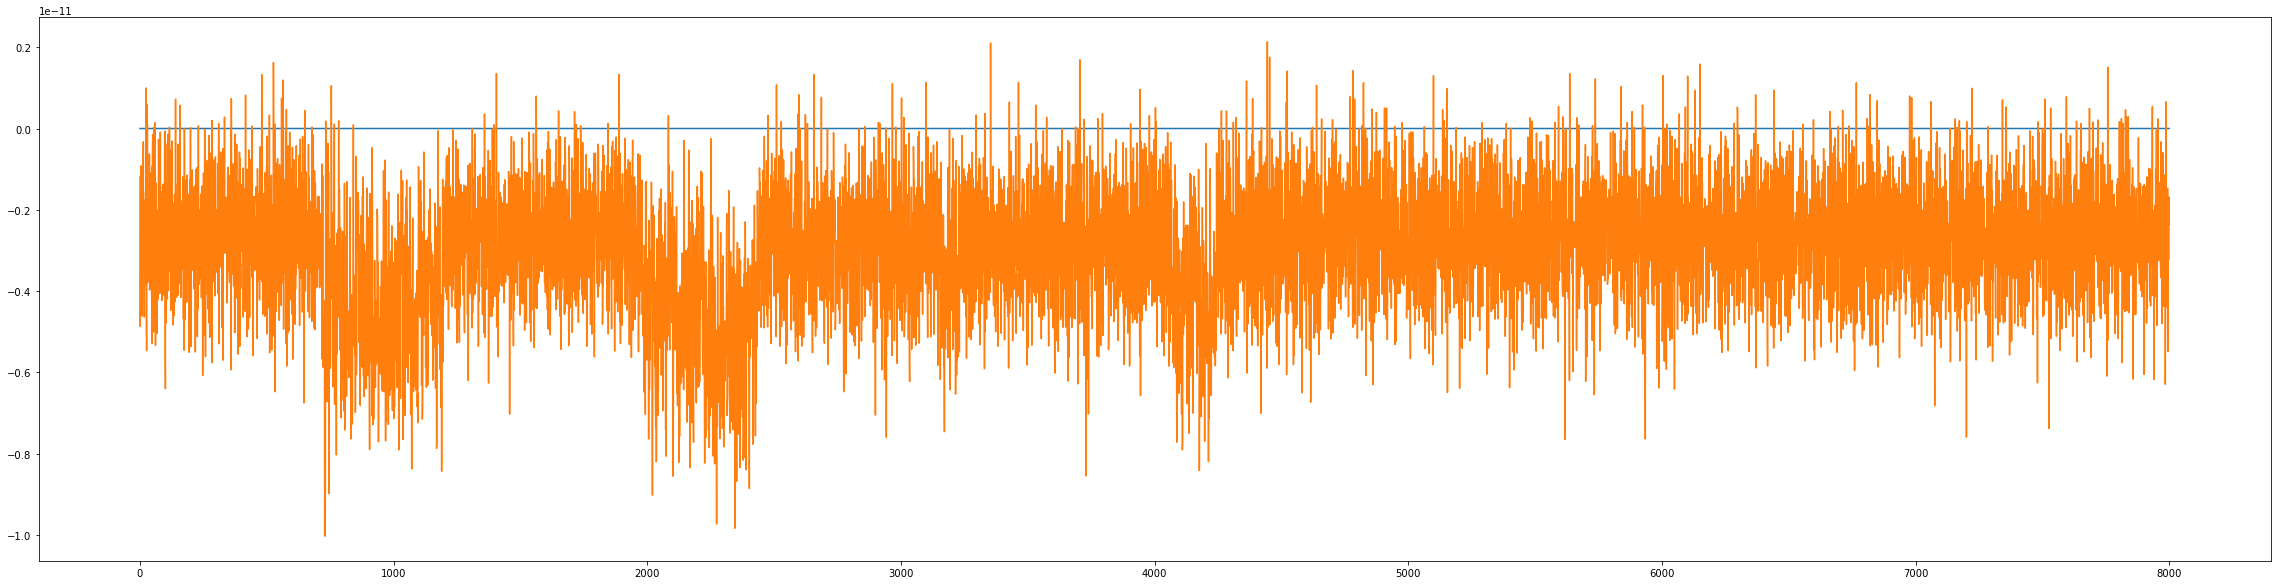

In [20]:
plt.figure(figsize=(40,10))
plt.plot(idealization)
plt.plot(trace)
plt.show()

In [21]:
from scipy.io import loadmat

In [129]:
x = loadmat('./data/data4.mat')

In [149]:
x.keys()

dict_keys(['__header__', '__version__', '__globals__', 'c001_Time\x00\x00\x00\xa0\x0f\x00\x00', 'c002_Ipatch\x00\xa0\x0f\x00\x00', 'c003_Piezo_Com\x00\x00', 'c004_10Vm\x00\x00\x00\xa0\x0f\x00\x00', 'c005_Ipatch\x00\xa0\x0f\x00\x00', 'c006_Piezo_Com\x00\x00', 'c007_10Vm\x00\x00\x00\xa0\x0f\x00\x00', 'c008_Ipatch\x00\xa0\x0f\x00\x00', 'c009_Piezo_Com\x00\x00', 'c010_10Vm\x00\x00\x00\xa0\x0f\x00\x00', 'c011_Ipatch\x00\xa0\x0f\x00\x00', 'c012_Piezo_Com\x00\x00', 'c013_10Vm\x00\x00\x00\xa0\x0f\x00\x00', 'c014_Ipatch\x00\xa0\x0f\x00\x00', 'c015_Piezo_Com\x00\x00', 'c016_10Vm\x00\x00\x00\xa0\x0f\x00\x00', 'c017_Ipatch\x00\xa0\x0f\x00\x00', 'c018_Piezo_Com\x00\x00', 'c019_10Vm\x00\x00\x00\xa0\x0f\x00\x00', 'c020_Ipatch\x00\xa0\x0f\x00\x00', 'c021_Piezo_Com\x00\x00', 'c022_10Vm\x00\x00\x00\xa0\x0f\x00\x00', 'c023_Ipatch\x00\xa0\x0f\x00\x00', 'c024_Piezo_Com\x00\x00', 'c025_10Vm\x00\x00\x00\xa0\x0f\x00\x00', 'c026_Ipatch\x00\xa0\x0f\x00\x00', 'c027_Piezo_Com\x00\x00', 'c028_10Vm\x00\x00\x00\xa0\

In [130]:
time = []
patch = []
piezo = []
command = []
n_old = 0
n = 0
data = []
for k in x.keys():
    if 'Time' in k:
        time = x[k]
    elif 'Ipatch' in k:
        current = x[k]
    elif 'Piezo' in k:
        piezo = x[k]
    elif '10Vm' in k:
        command = x[k]
    

In [133]:
%timeit c = [x[k] for k in l2]

The slowest run took 4.06 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.52 µs per loop


In [134]:
%timeit j = map(x.__getitem__, l2)

The slowest run took 15.51 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 237 ns per loop


In [147]:
model.Episode()

TypeError: __init__() missing 2 required positional arguments: 'time' and 'trace'